In [1]:
import torch

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

from model import Model
from custom_utils import load_diseases_data
from nets import FF_ResNet

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
train_images, train_labels, test_images, test_labels = load_diseases_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

(torch.Size([1894, 150, 100]),
 torch.Size([1894, 5, 2]),
 torch.Size([335, 150, 100]),
 torch.Size([335, 5, 2]))

In [4]:
net = FF_ResNet().to(device)
net

FF_ResNet(
  (d1): Linear(in_features=15000, out_features=200, bias=True)
  (d1_res): Linear(in_features=200, out_features=200, bias=True)
  (d2): Linear(in_features=200, out_features=50, bias=True)
  (d3): Linear(in_features=50, out_features=10, bias=True)
  (d3_res): Linear(in_features=10, out_features=10, bias=True)
  (tanh): Tanh()
)

In [5]:
disease_indxs = torch.unique(torch.where(train_labels[:, :, 1] == 1)[0])
disease_indxs.shape

torch.Size([1295])

In [6]:
model = Model(
    model=net, 
    train_input=train_images, #[disease_indxs], 
    train_label=train_labels, #[disease_indxs],
    test_input=test_images,
    test_label=test_labels
)

In [14]:

model.compile(
    optimizer=torch.optim.Adam, 
    lr=0.0001,
    loss=torch.nn.MSELoss()
)

In [16]:

model.train(
    epochs=100,
    batch_size=16
)

EPOCH [1/100], ====================> 100%, Loss = 0.030142977833747864, Accuracy = 96.25
Loss = 0.01533, Accuracy = 98.930%
Test loss = 0.03705, Test accuracy = 95.224%
EPOCH [2/100], ====================> 100%, Loss = 0.0058874222449958324, Accuracy = 100.0
Loss = 0.01927, Accuracy = 98.284%
Test loss = 0.03078, Test accuracy = 96.597%
EPOCH [3/100], ====================> 100%, Loss = 0.020204266533255577, Accuracy = 97.5
Loss = 0.01542, Accuracy = 98.814%
Test loss = 0.02963, Test accuracy = 96.836%
EPOCH [4/100], ====================> 100%, Loss = 0.008236877620220184, Accuracy = 98.75
Loss = 0.01583, Accuracy = 98.803%
Test loss = 0.03388, Test accuracy = 95.821%
EPOCH [5/100], ====================> 100%, Loss = 0.011974110268056393, Accuracy = 98.75
Loss = 0.01306, Accuracy = 99.153%
Test loss = 0.02402, Test accuracy = 97.791%
EPOCH [6/100], ====================> 100%, Loss = 0.013354419730603695, Accuracy = 98.75
Loss = 0.01054, Accuracy = 99.576%
Test loss = 0.02307, Test accur

In [17]:
torch.where(test_labels[:, 3, 1] == 1)

(tensor([  7,  14,  15,  44,  46,  54, 123, 166, 167, 209, 282],
        device='cuda:0'),)

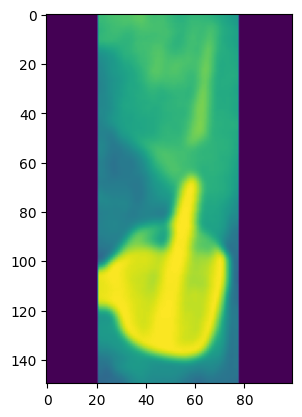

In [18]:
plt.imshow(test_images[7].cpu().numpy())

In [19]:
net(test_images[None, 7])

tensor([[[ 9.9996e-01, -6.4836e-02],
         [ 9.9710e-01,  3.5207e-03],
         [ 9.1403e-03,  1.0396e+00],
         [ 5.9391e-02,  9.2748e-01],
         [ 1.4211e-04,  1.0093e+00]]], device='cuda:0',
       grad_fn=<ReshapeAliasBackward0>)

<Figure size 640x480 with 0 Axes>

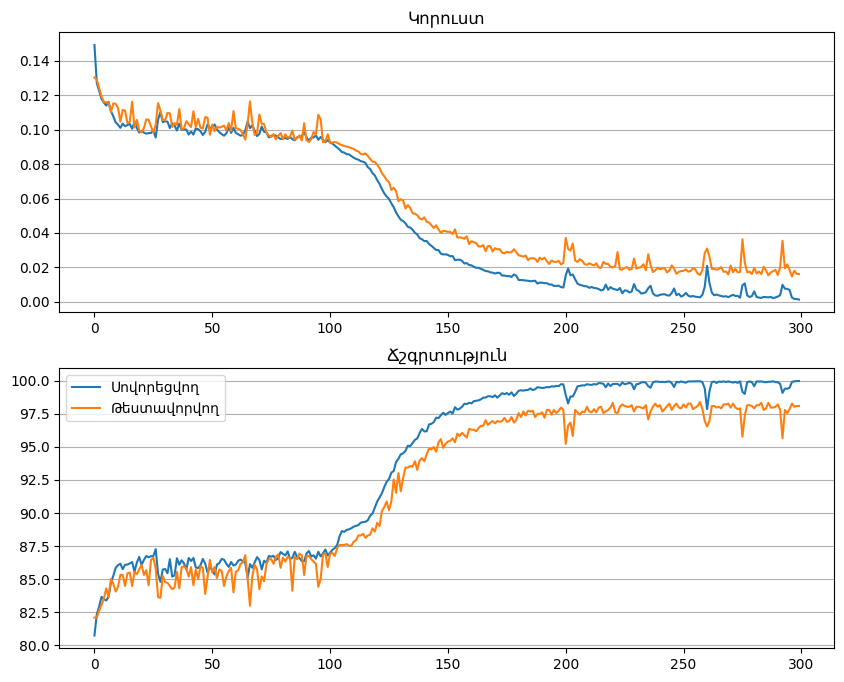

In [20]:
model.draw_plots()

In [21]:
# torch.save(net, '../models/disease_ff_resnet.pt')